# 00 Init

## Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting to use py files

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [ ]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [ ]:
! pip install codes

## Import py files

In [ ]:
# baseline : Env, Agent
# from codes.environment.reward5 import *
from codes.environment.reward5 import *
from codes.agent.vectorDQN import *
from codes.net.basic import *
from codes.trainer.validShutDown import *
from codes.tester.basic import *
# import codes.trainer.trainerWithValidShutDown as Trainer


## Import Libraries

# 01 Info

## level dictionary

In [ ]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [ ]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.01
LEARN_DECAY = 0.9999975
LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.99975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 64
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [ ]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'])

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

agent = Limited18Agent(env=env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## TRAIN_PARAMETERS

In [ ]:
EPISODES = 200000
PRINT_INTERVAL = 1000
TRAIN_RENDER = False

TRAIN_TIMESTEPS = ['every timestep', 'every episodes']
TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0]
VIUSAL_INTERVAL = 100

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

In [ ]:
tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    LEARN_MIN=LEARN_MIN,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

Episode: [200000/1000], Median progress: 8.00, Median reward: -2.50, Win rate : 0.00, Epsilon: 0.02
Episode: [200000/2000], Median progress: 7.00, Median reward: -1.30, Win rate : 0.00, Epsilon: 0.01
Episode: [200000/3000], Median progress: 8.00, Median reward: -1.30, Win rate : 0.00, Epsilon: 0.01
Episode: [200000/4000], Median progress: 9.00, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.01
Valid n:1000, Median progress: 5.00, Median reward: -0.60, Win rate : 0.001
Valid n:1000, Median progress: 4.00, Median reward: -0.70, Win rate : 0.0
Valid n:1000, Median progress: 4.00, Median reward: -0.90, Win rate : 0.0
Valid n:1000, Median progress: 4.00, Median reward: -0.90, Win rate : 0.0
Valid n:1000, Median progress: 5.00, Median reward: -0.90, Win rate : 0.0
Valid n:1000, Median progress: 5.00, Median reward: -0.70, Win rate : 0.001
Valid n:1000, Median progress: 5.00, Median reward: -0.70, Win rate : 0.001
Valid n:1000, Median progress: 5.00, Median reward: -0.70, Win rate : 0.0
Va

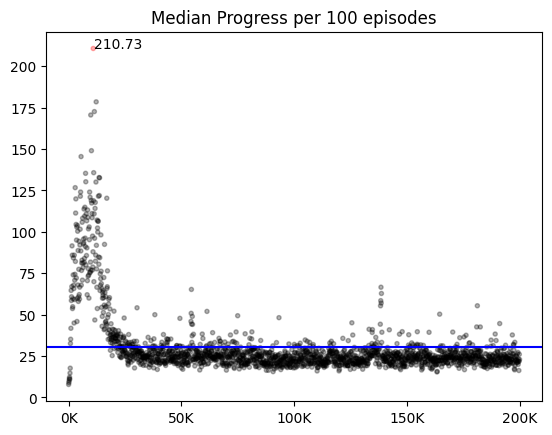

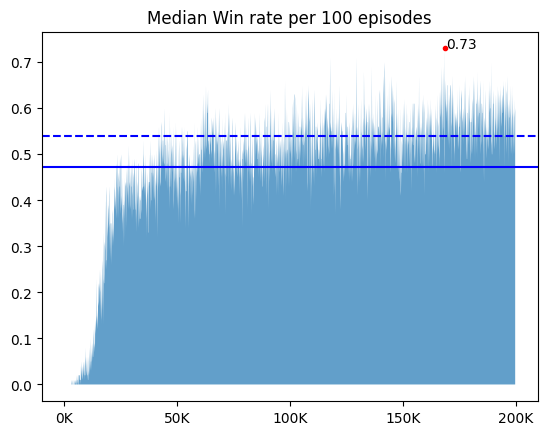

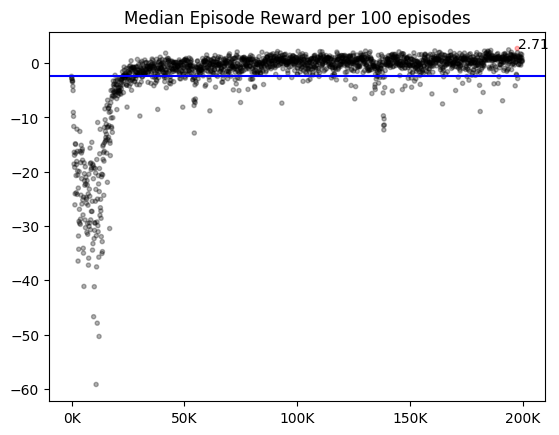

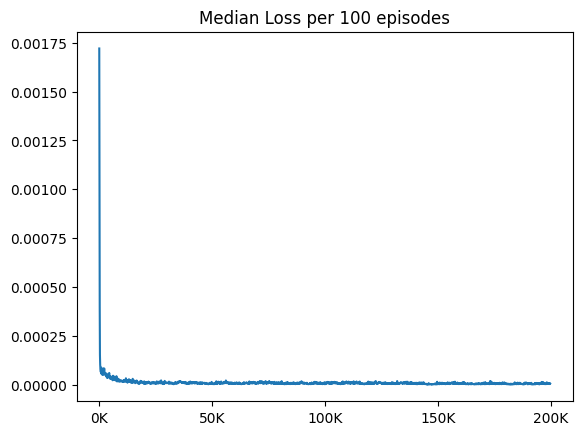

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/episodeInterval'는 이미 존재합니다.
모델이 저장되었습니다.


In [26]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name='episodeInterval',
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0],
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)